In [1]:
%matplotlib inline

from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_recall_fscore_support
from sklearn.linear_model import LinearRegression
import matplotlib.pylab as plt
import pandas as pd
import numpy as np
from pandas.tools.plotting import scatter_matrix

In [11]:
import json
from pprint import pprint

with open('/Users/danielkershaw/Downloads/part-00002') as data_file:    
    data = json.load(data_file)
    
result_act = pd.read_json(data["result_act"]).sort_index()
result_user = pd.read_json(data["result_user"]).sort_index()

result_act_features = ["inffectedCommunitiesnor", "time_step_mean", "surface_mean"]
result_act_features = ["time_step_max", "time_step_mean", "time_step_median", "time_step_min", "time_step_var","depth"]

In [12]:
result_user.head()

,ActivateionExposure,UserExposure,UserExposure_cv,UserExposure_mean,UserExposure_median,UserExposure_min,UserExposure_var,community,degree,degree_cv,...,time_step_max,time_step_mean,time_step_median,time_step_min,time_step_var,usageEntorpy,usagedominance,userUsageEntorpy,userusagedominance,word
0,14,4,1.581139,0,2.0,4,2.500000,9,655,775.995296,...,8.381546,3.092981,1.829086,0.332206,13.063823,0.000000,1.000000,0.000000,1.000000,ervia
1,23,10,4.453135,0,8.0,17,19.830409,3,625,508.624294,...,3.096124,0.795263,0.508094,0.034458,0.677297,1.798045,0.326531,1.856270,0.380952,dodatek
2,40,13,4.049691,0,4.0,13,16.400000,8,846,547.193811,...,2.531451,0.911950,0.454623,0.001087,1.015655,1.214661,0.476190,1.263479,0.466667,docomo
3,32,10,3.509172,0,3.0,10,12.314286,4,742,437.561043,...,1.380850,0.692277,0.714087,0.000366,0.188848,1.851679,0.341463,2.187322,0.187500,dlam
4,40,28,7.096232,0,7.0,28,50.356506,4,1032,345.997033,...,0.928537,0.066096,0.002053,0.000069,0.044511,1.599980,0.588235,1.860518,0.473684,djuricic


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x166b25390>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x132859390>]], dtype=object)

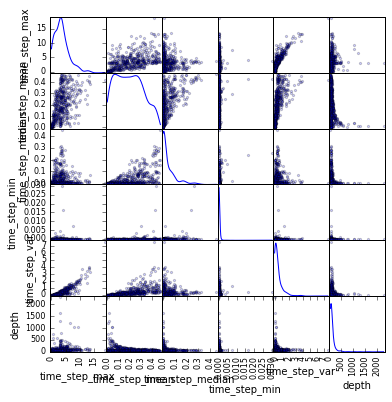

In [13]:
scatter_matrix(result_act[result_act_features], alpha=0.2, figsize=(6, 6), diagonal='kde')

In [99]:
result_act['is_train'] = np.random.uniform(0, 1, len(result_act)) <= .75
train, test = result_act[result_act_features+["depth"]][result_act['is_train']==True], result_act[result_act['is_train']==False]

In [126]:
lm = LinearRegression(fit_intercept=False)

In [127]:
lm.fit(train[result_act_features], train["depth"])

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=1, normalize=False)

In [128]:
print "Estimated intercept coefficent:", lm.intercept_
print "Number of coefficents:", len(lm.coef_)

Estimated intercept coefficent: 0.0
Number of coefficents: 3


In [129]:
pd.DataFrame(zip(train.columns, lm.coef_), columns=["features","estimatedCoefficent"])

,features,estimatedCoefficent
0,inffectedCommunitiesnor,59.965662
1,time_step_mean,-409.164450
2,surface_mean,0.073514


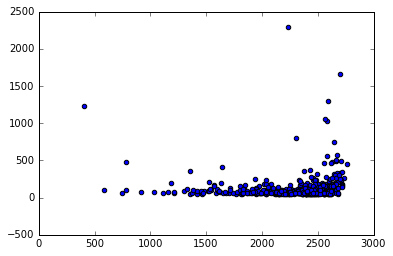

In [130]:
plt.scatter(result_act["surface_mean"],result_act["depth"])

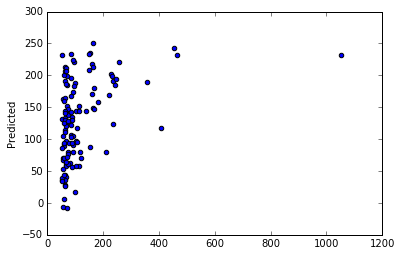

In [131]:
plt.scatter(test["depth"],lm.predict(test[result_act_features]))
plt.xlabel("")
plt.ylabel("Predicted")

In [132]:
mseFull = np.mean((test["depth"] - lm.predict(test[result_act_features])) **2 )
print mseFull

12057.2953532


In [133]:
import sklearn
X_train, X_test, Y_train, Y_test = sklearn.cross_validation.train_test_split(result_act[result_act_features],result_act["depth"],test_size=0.33, random_state=5)

In [134]:
lm = LinearRegression()
lm.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [135]:
pred_train = lm.predict(X_train)
pred_test = lm.predict(X_test)

In [136]:
print "Fit a model X_train, and calculate MSE with Y_train:", np.mean((Y_train - lm.predict(X_train)) ** 2)
print "Fit a model X_train, and calculate MSE with X_test, Y_test:", np.mean((Y_test - lm.predict(X_test)) ** 2)

Fit a model X_train, and calculate MSE with Y_train: 23240.0403992
Fit a model X_train, and calculate MSE with X_test, Y_test: 32431.8096009


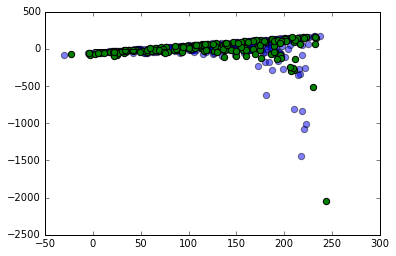

In [137]:
plt.scatter(lm.predict(X_train), lm.predict(X_train) - Y_train, c='b', s=40, alpha=0.5)
plt.scatter(lm.predict(X_test), lm.predict(X_test) - Y_test, c='g', s=40)
plt.hlines(y = 0, xmin = 0, xmax = 50)